In [1]:
# NAME: HAARISH V
# REG NO: 212223230067
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

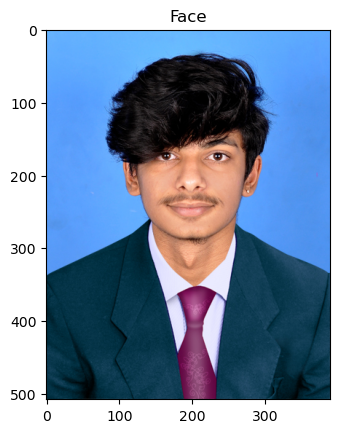

In [13]:
# Load the Face Image
faceImage = cv2.imread('photo.jpg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [15]:
faceImage.shape

(488, 370, 3)

Text(0.5, 1.0, 'glassPNG')

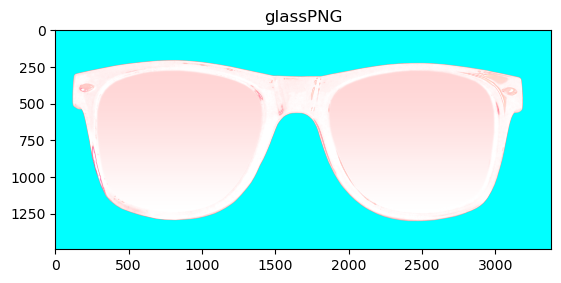

In [16]:
glassPNG = cv2.imread('glass.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

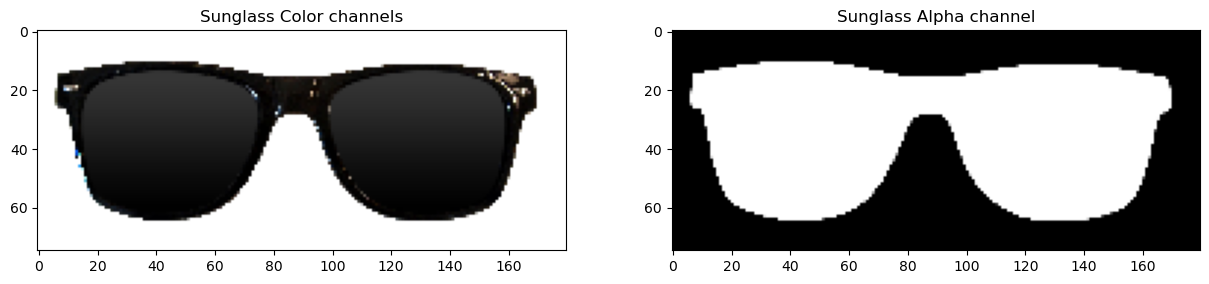

In [18]:
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

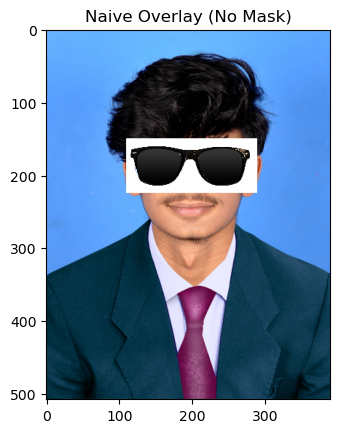

In [19]:

faceImage = cv2.imread("Photo.jpg")
glassPNG = cv2.imread("glass.png", -1)


glassBGR = glassPNG[:, :, :3]


glassBGR = cv2.resize(glassBGR, (180, 75))  


faceWithGlassesNaive = faceImage.copy()


y, x = 150, 110   
h, w = glassBGR.shape[:2]


faceWithGlassesNaive[y:y+h, x:x+w] = glassBGR


plt.imshow(faceWithGlassesNaive[..., ::-1])
plt.title("Naive Overlay (No Mask)")
plt.show()

Face shape: (488, 370, 3)
Original Glasses shape: (1494, 3381, 4)
Resized Glasses shape: (75, 180, 4)


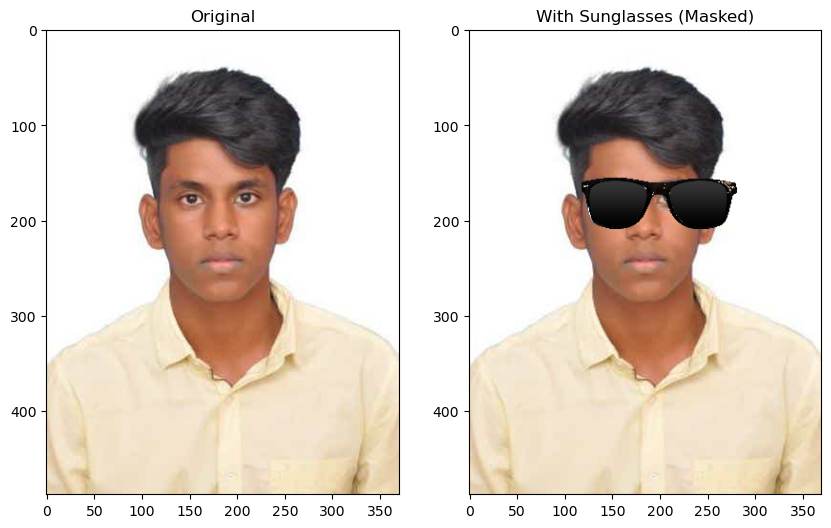

In [14]:

faceImage = cv2.imread("photo.jpg")
print("Face shape:", faceImage.shape)

glassPNG = cv2.imread("glass.png", -1)   
print("Original Glasses shape:", glassPNG.shape)


glassPNG = cv2.resize(glassPNG, (180, 75))  
print("Resized Glasses shape:", glassPNG.shape)


glassBGR = glassPNG[:, :, :3]
glassMask1 = glassPNG[:, :, 3]


glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))


glassMask = np.uint8(glassMask / 255)


faceWithGlasses = faceImage.copy()


x, y = 111, 145
h, w = glassBGR.shape[:2]


roi = faceWithGlasses[y:y+h, x:x+w]


maskedEye   = cv2.multiply(roi, (1 - glassMask))  
maskedGlass = cv2.multiply(glassBGR, glassMask)    


roiFinal = cv2.add(maskedEye, maskedGlass)

# Place combined result back on face
faceWithGlasses[y:y+h, x:x+w] = roiFinal

# Show results
plt.figure(figsize=[10,15])
plt.subplot(121); plt.imshow(faceImage[:,:,::-1]); plt.title("Original")
plt.subplot(122); plt.imshow(faceWithGlasses[:,:,::-1]); plt.title("With Sunglasses (Masked)")
plt.show()